In [ ]:
import pandas as pd

from rdkit.Chem import Descriptors, MolFromSmiles

from tqdm.notebook import tqdm

In [ ]:
df = pd.read_csv("../data/data.csv.gz", sep=",", low_memory=False, index_col=0)

In [ ]:
df = df.dropna(axis=0).reset_index(drop=True)

In [ ]:
display(df.head())
print(f"df shape: {df.shape}")

,smiles,homolumogap
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,3.047675
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,4.410966
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,4.639541
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,4.492600
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,4.612330


df shape: (3452151, 2)


In [ ]:
df.to_csv("../data/data_raw.csv")

In [ ]:
# df[df["smiles"].str.contains("Br")]

In [ ]:
smiles = df.loc[0, "smiles"]
smiles_2 = df.loc[1, "smiles"]
print("Smiles 1:", smiles)
print("Smiles 2:", smiles_2)

Smiles 1: O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C
Smiles 2: COc1cc(OC)ccc1/C=C/N(C(=O)C)C


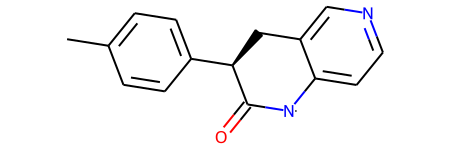

Molecule 1


In [ ]:
molecule = MolFromSmiles(smiles)
display(molecule)
print("Molecule 1")

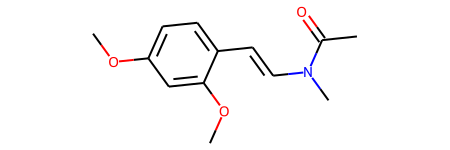

Molecule 2


In [ ]:
molecule_2 = MolFromSmiles(smiles_2)
display(molecule_2)
print("Molecule 2")

## - [RDKit Docs](https://www.rdkit.org/docs/GettingStartedInPython.html)
## - [rdkit.Chem.Mol docs](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol)
## - [rdkit.Chem.Descriptors docs](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)
## - [rdkit.Chem.Atom docs](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Atom)
## - [MPNN](https://keras.io/examples/graph/mpnn-molecular-graphs/)

## Theory links:
### - [FP Morgan Density](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/6%3A_Molecular_Similarity/6.4%3A_R_Assignment)

In [ ]:
class NumOfAtomsByAtomicNumber(Descriptors.PropertyFunctor):
    def __init__(self, atomic_number):
        Descriptors.PropertyFunctor.__init__(self, "NumOfAtomsByAtomicNumber", "1.0.0")
        self.atomic_number = atomic_number

    def __call__(self, mol):
        filtered_list = filter(lambda atom: atom.GetAtomicNum() == self.atomic_number, mol.GetAtoms())
        return len(list(filtered_list))

In [ ]:
NumberOfB = NumOfAtomsByAtomicNumber(atomic_number=5)
NumberOfC = NumOfAtomsByAtomicNumber(atomic_number=6)
NumberOfN = NumOfAtomsByAtomicNumber(atomic_number=7)
NumberOfO = NumOfAtomsByAtomicNumber(atomic_number=8)
NumberOfF = NumOfAtomsByAtomicNumber(atomic_number=9)
NumberOfSi = NumOfAtomsByAtomicNumber(atomic_number=14)
NumberOfP = NumOfAtomsByAtomicNumber(atomic_number=15)
NumberOfS = NumOfAtomsByAtomicNumber(atomic_number=16)
NumberOfCl = NumOfAtomsByAtomicNumber(atomic_number=17)
NumberOfBr = NumOfAtomsByAtomicNumber(atomic_number=35)

In [ ]:
feature_extraction_dict = {
    "number_of_atoms": "molecule.GetNumAtoms(onlyExplicit=False)",
    "number_of_atoms_except_H": "molecule.GetNumAtoms(onlyExplicit=True)",
    "number_of_bonds": "molecule.GetNumBonds(onlyHeavy=0)",
    "number_of_heavy_bonds": "molecule.GetNumBonds(onlyHeavy=1)",
    "number_of_conformations": "molecule.GetNumConformers()",
    "number_of_heavy_atoms": "molecule.GetNumHeavyAtoms()",
    "exact_mol_weight": "Descriptors.ExactMolWt(molecule)",
    "average_mol_weight": "Descriptors.MolWt(molecule)",
    "heavy_mol_weight": "Descriptors.HeavyAtomMolWt(molecule)",
    "number_of_radical_electrons": "Descriptors.NumRadicalElectrons(molecule)",
    "number_of_valence_electrons": "Descriptors.NumValenceElectrons(molecule)",
    "fp_morgan_density_1": "Descriptors.FpDensityMorgan1(molecule)",
    "fp_morgan_density_2": "Descriptors.FpDensityMorgan2(molecule)",
    "fp_morgan_density_3": "Descriptors.FpDensityMorgan3(molecule)",
    "max_absolute_partial_charge": "Descriptors.MaxAbsPartialCharge(molecule)",
    "min_absolute_partial_charge": "Descriptors.MinAbsPartialCharge(molecule)",
    "max_partial_charge": "Descriptors.MaxPartialCharge(molecule)",
    "min_partial_charge": "Descriptors.MinPartialCharge(molecule)",
    "number_of_B_atoms": "NumberOfB(molecule)",
    "number_of_C_atoms": "NumberOfC(molecule)",
    "number_of_N_atoms": "NumberOfN(molecule)",
    "number_of_O_atoms": "NumberOfO(molecule)",
    "number_of_F_atoms": "NumberOfF(molecule)",
    "number_of_Si_atoms": "NumberOfSi(molecule)",
    "number_of_P_atoms": "NumberOfP(molecule)",
    "number_of_S_atoms": "NumberOfS(molecule)",
    "number_of_Cl_atoms": "NumberOfCl(molecule)",
    "number_of_Br_atoms": "NumberOfBr(molecule)",
}

In [ ]:
df_features = df.copy()

In [ ]:
def extract_feature_from_molecule(smiles, str_method):
    molecule = MolFromSmiles(smiles)
    return eval(str_method)

In [ ]:
for k in list(feature_extraction_dict.keys()):
    print(f"Extracting feature '{k}'...", end="")
    df_features[k] = df_features["smiles"].apply(lambda smiles: extract_feature_from_molecule(smiles, feature_extraction_dict[k]))
    print(" OK")

Extracting feature 'number_of_atoms'... OK
Extracting feature 'number_of_atoms_except_H'... OK
Extracting feature 'number_of_bonds'...

In [ ]:
df_features.head()

In [ ]:
df_features.to_csv("../data/df_features.csv")

In [ ]:
import pandas as pd

from rdkit.Chem import Descriptors, MolFromSmiles

from tqdm.notebook import tqdm

In [ ]:
df = pd.read_csv("../data/data.csv.gz", sep=",", low_memory=False, index_col=0)

In [ ]:
df = df.dropna(axis=0).reset_index(drop=True)

In [ ]:
display(df.head())
print(f"df shape: {df.shape}")

,smiles,homolumogap
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,3.047675
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,4.410966
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,4.639541
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,4.492600
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,4.612330


df shape: (3452151, 2)


In [ ]:
df.to_csv("../data/data_raw.csv")

In [ ]:
# df[df["smiles"].str.contains("Br")]

In [ ]:
smiles = df.loc[0, "smiles"]
smiles_2 = df.loc[1, "smiles"]
print("Smiles 1:", smiles)
print("Smiles 2:", smiles_2)

Smiles 1: O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C
Smiles 2: COc1cc(OC)ccc1/C=C/N(C(=O)C)C


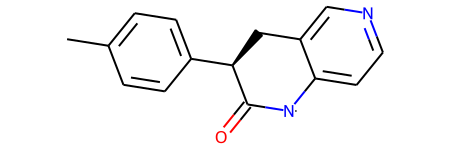

Molecule 1


In [ ]:
molecule = MolFromSmiles(smiles)
display(molecule)
print("Molecule 1")

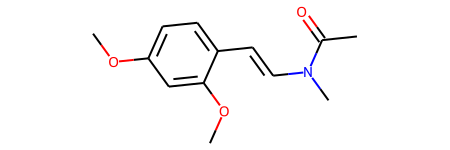

Molecule 2


In [ ]:
molecule_2 = MolFromSmiles(smiles_2)
display(molecule_2)
print("Molecule 2")

## - [RDKit Docs](https://www.rdkit.org/docs/GettingStartedInPython.html)
## - [rdkit.Chem.Mol docs](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol)
## - [rdkit.Chem.Descriptors docs](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)
## - [rdkit.Chem.Atom docs](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Atom)
## - [MPNN](https://keras.io/examples/graph/mpnn-molecular-graphs/)

## Theory links:
### - [FP Morgan Density](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/6%3A_Molecular_Similarity/6.4%3A_R_Assignment)

In [ ]:
class NumOfAtomsByAtomicNumber(Descriptors.PropertyFunctor):
    def __init__(self, atomic_number):
        Descriptors.PropertyFunctor.__init__(self, "NumOfAtomsByAtomicNumber", "1.0.0")
        self.atomic_number = atomic_number

    def __call__(self, mol):
        filtered_list = filter(lambda atom: atom.GetAtomicNum() == self.atomic_number, mol.GetAtoms())
        return len(list(filtered_list))

In [ ]:
NumberOfB = NumOfAtomsByAtomicNumber(atomic_number=5)
NumberOfC = NumOfAtomsByAtomicNumber(atomic_number=6)
NumberOfN = NumOfAtomsByAtomicNumber(atomic_number=7)
NumberOfO = NumOfAtomsByAtomicNumber(atomic_number=8)
NumberOfF = NumOfAtomsByAtomicNumber(atomic_number=9)
NumberOfSi = NumOfAtomsByAtomicNumber(atomic_number=14)
NumberOfP = NumOfAtomsByAtomicNumber(atomic_number=15)
NumberOfS = NumOfAtomsByAtomicNumber(atomic_number=16)
NumberOfCl = NumOfAtomsByAtomicNumber(atomic_number=17)
NumberOfBr = NumOfAtomsByAtomicNumber(atomic_number=35)

In [ ]:
feature_extraction_dict = {
    "number_of_atoms": "molecule.GetNumAtoms(onlyExplicit=False)",
    "number_of_atoms_except_H": "molecule.GetNumAtoms(onlyExplicit=True)",
    "number_of_bonds": "molecule.GetNumBonds(onlyHeavy=0)",
    "number_of_heavy_bonds": "molecule.GetNumBonds(onlyHeavy=1)",
    "number_of_conformations": "molecule.GetNumConformers()",
    "number_of_heavy_atoms": "molecule.GetNumHeavyAtoms()",
    "exact_mol_weight": "Descriptors.ExactMolWt(molecule)",
    "average_mol_weight": "Descriptors.MolWt(molecule)",
    "heavy_mol_weight": "Descriptors.HeavyAtomMolWt(molecule)",
    "number_of_radical_electrons": "Descriptors.NumRadicalElectrons(molecule)",
    "number_of_valence_electrons": "Descriptors.NumValenceElectrons(molecule)",
    "fp_morgan_density_1": "Descriptors.FpDensityMorgan1(molecule)",
    "fp_morgan_density_2": "Descriptors.FpDensityMorgan2(molecule)",
    "fp_morgan_density_3": "Descriptors.FpDensityMorgan3(molecule)",
    "max_absolute_partial_charge": "Descriptors.MaxAbsPartialCharge(molecule)",
    "min_absolute_partial_charge": "Descriptors.MinAbsPartialCharge(molecule)",
    "max_partial_charge": "Descriptors.MaxPartialCharge(molecule)",
    "min_partial_charge": "Descriptors.MinPartialCharge(molecule)",
    "number_of_B_atoms": "NumberOfB(molecule)",
    "number_of_C_atoms": "NumberOfC(molecule)",
    "number_of_N_atoms": "NumberOfN(molecule)",
    "number_of_O_atoms": "NumberOfO(molecule)",
    "number_of_F_atoms": "NumberOfF(molecule)",
    "number_of_Si_atoms": "NumberOfSi(molecule)",
    "number_of_P_atoms": "NumberOfP(molecule)",
    "number_of_S_atoms": "NumberOfS(molecule)",
    "number_of_Cl_atoms": "NumberOfCl(molecule)",
    "number_of_Br_atoms": "NumberOfBr(molecule)",
}

In [ ]:
df_features = df.copy()

In [ ]:
def extract_feature_from_molecule(smiles, str_method):
    molecule = MolFromSmiles(smiles)
    return eval(str_method)

In [ ]:
for k in list(feature_extraction_dict.keys()):
    print(f"Extracting feature '{k}'...", end="")
    df_features[k] = df_features["smiles"].apply(lambda smiles: extract_feature_from_molecule(smiles, feature_extraction_dict[k]))
    print(" OK")

Extracting feature 'number_of_atoms'... OK
Extracting feature 'number_of_atoms_except_H'... OK
Extracting feature 'number_of_bonds'...

In [ ]:
df_features.head()

In [ ]:
df_features.to_csv("../data/df_features.csv")